In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X = pd.read_csv('train_features.csv', sep=",")
X.head(10)

X.info()
X=X.drop(['match_id_hash'],axis=1)
X.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39675 entries, 0 to 39674
Columns: 246 entries, match_id_hash to d5_sen_placed
dtypes: float64(30), int64(215), object(1)
memory usage: 74.5+ MB


,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
0,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.000000,0,0,0,0
1,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.000000,0,0,0,0
2,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.000000,0,0,0,0
3,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.000000,0,0,2,0
4,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.250000,0,0,0,0
5,160,22,7,0,0,57,0,0,0,1,...,0.000000,0,0,0,0,0.000000,0,0,0,0
6,1016,22,0,1,0,119,0,3,3,5,...,8.264696,0,0,3,0,0.250000,0,0,3,0
7,582,22,7,2,2,12,3,1,2,9,...,15.762911,3,1,0,1,0.500000,0,0,3,0
8,636,22,7,1,5,74,1,1,0,3,...,8.064697,0,0,1,0,0.428571,0,0,1,0
9,1054,22,0,8,5,71,1,3,10,4,...,2.899237,0,0,11,0,0.636364,0,0,0,0


In [4]:
for i in X.columns:
    X[i] = X[i].astype(int)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39675 entries, 0 to 39674
Columns: 245 entries, game_time to d5_sen_placed
dtypes: int32(245)
memory usage: 37.1 MB


In [6]:
X.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
0,155,22,7,1,11,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,658,4,0,3,10,15,7,2,0,7,...,0,0,0,0,0,0,0,0,0,0
2,21,23,0,0,0,101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,576,22,7,1,4,14,1,0,3,1,...,8,3,1,3,0,0,0,0,2,0
4,453,22,7,1,3,42,0,1,1,0,...,0,2,1,2,0,0,0,0,0,0


In [7]:
Y = pd.read_csv('train_targets.csv', sep=",")
Y.head(10)

,match_id_hash,game_time,radiant_win,duration,time_remaining,next_roshan_team
0,a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
1,b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
2,6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
3,46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
4,b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN
5,19c39fe2af2b547e48708ca005c6ae74,160,False,2063,1903,NaN
6,c96d629dc0c39f0c616d1949938a6ba6,1016,True,2147,1131,Radiant
7,156c88bff4e9c4668b0f53df3d870f1b,582,False,1927,1345,Dire
8,df50f738c454d430a33b2bf90cb9ef1a,636,False,2059,1423,NaN
9,7469e9440ea3d19b211a484647c7126e,1054,False,2287,1233,NaN


In [8]:
Y=Y.drop(['match_id_hash'],axis=1)
Y=Y.drop(['game_time'],axis=1)
Y=Y.drop(['duration'],axis=1)
Y=Y.drop(['time_remaining'],axis=1)
Y=Y.drop(['next_roshan_team'],axis=1)

In [9]:
Y["radiant_win"] = Y["radiant_win"].astype(int)

In [10]:
Y.head()

print(len(Y))
print(len(X))

39675
39675


<AxesSubplot:xlabel='radiant_win', ylabel='count'>

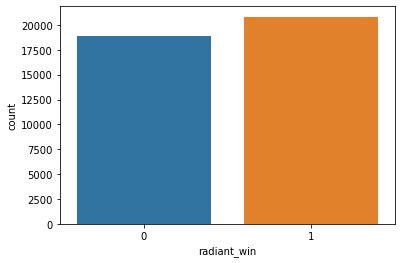

In [11]:
sns.countplot(x=Y['radiant_win'],data=Y)

In [12]:
X.isnull().sum()

game_time                     0
game_mode                     0
lobby_type                    0
objectives_len                0
chat_len                      0
                             ..
d5_teamfight_participation    0
d5_towers_killed              0
d5_roshans_killed             0
d5_obs_placed                 0
d5_sen_placed                 0
Length: 245, dtype: int64

In [13]:
#Usando GridSearchCV
Y = Y['radiant_win'].values
X = X.values

print(X.shape)
print(Y.shape)

def modeloAEntrenar(modelo,parametros,X,Y):
    kfoldEstratificado = StratifiedKFold(n_splits=10)
    resultadoModelo = GridSearchCV(modelo, cv=kfoldEstratificado, param_grid=parametros, return_train_score=True, n_jobs=-1)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, shuffle=True)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
    resultadoModelo.fit(X_train, Y_train)
    print("Mejores Parametros:",resultadoModelo.best_params_)
    return resultadoModelo,X_test,Y_test

(39675, 245)
(39675,)


In [13]:
gnb = GaussianNB()
params = {}
gsGaussianNB,X_test,Y_test = modeloAEntrenar(gnb,params,X,Y)



C:\Users\Daniel Arango Obando\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[0 1 1 ... 0 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Mejores Parametros: {}


In [15]:
#Guardar el modelo
joblib.dump(gsGaussianNB,'Modelos/GaussianNB.pkl')
#Cargar Modelo
#nombre_modelo = 'Modelos/GaussianNB.pkl'
#gbt = joblib.load(nombre_modelo)

['Modelos/GaussianNB.pkl']

In [16]:
predict = gsGaussianNB.predict(X_test)
acc_NB = accuracy_score(predict, Y_test)
pre_NB = precision_score(predict, Y_test)
rec_NB = recall_score(predict, Y_test)
f1_NB = f1_score(predict, Y_test)

In [17]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Modelo Naive Bayes': [acc_NB, pre_NB, rec_NB, f1_NB]
    })
table

,Metric,Modelo Naive Bayes
0,Accuracy,0.667801
1,Precision,0.843289
2,Recall,0.636895
3,F1 Score,0.725702


Text(0.5, 1.0, 'Curva ROC')

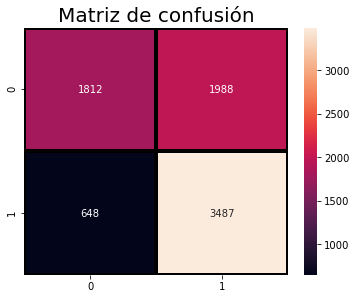

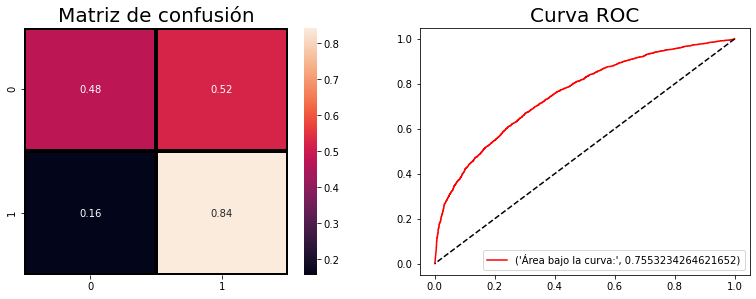

In [18]:
#Matriz de confusión
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test, predict),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
matriss = confusion_matrix(Y_test,predict,normalize='true')
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(matriss,annot=True,linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
# Curva ROC
predicting_probabilites = gsGaussianNB.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test, predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Área bajo la curva:",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("Curva ROC",fontsize=20)

In [19]:
GBT = GradientBoostingClassifier()
params = {'n_estimators':[10,20,50,100,150,200,250]}
gbt,X_test,Y_test = modeloAEntrenar(GBT,params,X,Y)

C:\Users\Daniel Arango Obando\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[1 0 1 ... 0 1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Mejores Parametros: {'n_estimators': 250}


In [20]:
#Guardar el modelo
joblib.dump(gbt,'Modelos/ModeloGradientBoostingTree.pkl')
#Cargar Modelo
#nombre_modelo = 'Modelos/ModeloGradientBoostingTree.pkl'
#gbt = joblib.load(nombre_modelo)

['Modelos/ModeloGradientBoostingTree.pkl']

In [21]:
predict = gbt.predict(X_test)
acc_gbt = accuracy_score(predict, Y_test)
pre_gbt = precision_score(predict, Y_test)
rec_gbt = recall_score(predict, Y_test)
f1_gbt = f1_score(predict, Y_test)

In [22]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Modelo GBT': [acc_gbt, pre_gbt, rec_gbt, f1_gbt]
    })
table

,Metric,Modelo GBT
0,Accuracy,0.717328
1,Precision,0.781717
2,Recall,0.707796
3,F1 Score,0.742923


Text(0.5, 1.0, 'Curva ROC')

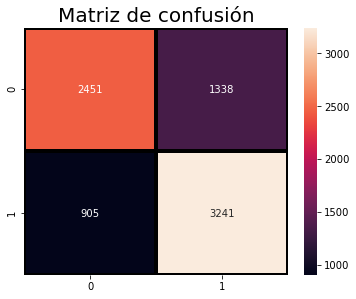

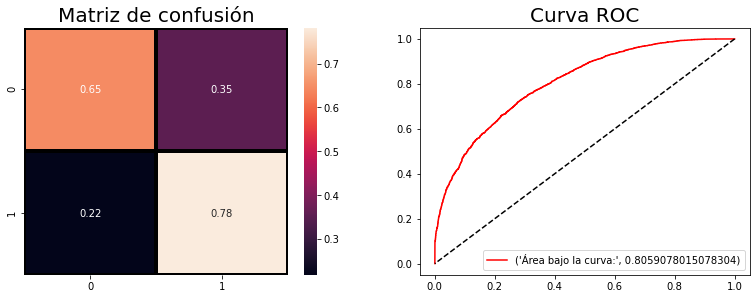

In [23]:
#Matriz de confusión
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test, predict),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
matriss = confusion_matrix(Y_test,predict,normalize='true')
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(matriss,annot=True,linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
# Curva ROC
predicting_probabilites = gbt.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test, predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Área bajo la curva:",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("Curva ROC",fontsize=20)

In [13]:
MLPC = MLPClassifier()
parameters = {
    'solver': ['adam'],
    'max_iter': [300,400,500],
    'alpha': 10.0** -np.arange(1, 4),
    'hidden_layer_sizes':[(100,100,100)],
    'activation': ["logistic","tanh"]
}
RNA,X_test,Y_test = modeloAEntrenar(MLPC,parameters,X,Y)


C:\Users\Daniel Arango Obando\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[1 0 0 ... 1 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Mejores Parametros: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'max_iter': 400, 'solver': 'adam'}


In [14]:
#Guardar el modelo
joblib.dump(RNA,'Modelos/ModeloRedesNeuronalesArtificiales.pkl')
#Cargar Modelo
#nombre_modelo = 'Modelos/ModeloRedesNeuronalesArtificiales.pkl'
#RNA = joblib.load(nombre_modelo)

['Modelos/ModeloRedesNeuronalesArtificiales.pkl']

In [15]:
predict = RNA.predict(X_test)
acc_RNA = accuracy_score(predict, Y_test)
pre_RNA = precision_score(predict, Y_test)
rec_RNA = recall_score(predict, Y_test)
f1_RNA = f1_score(predict, Y_test)

In [16]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Modelo RNA': [acc_RNA, pre_RNA, rec_RNA, f1_RNA]
    })
table

,Metric,Modelo RNA
0,Accuracy,0.671330
1,Precision,0.634303
2,Recall,0.712105
3,F1 Score,0.670956


Text(0.5, 1.0, 'Curva ROC')

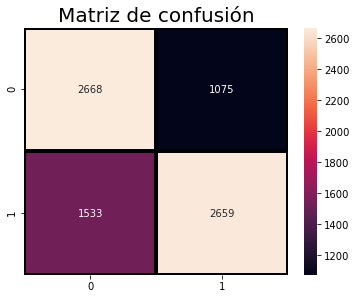

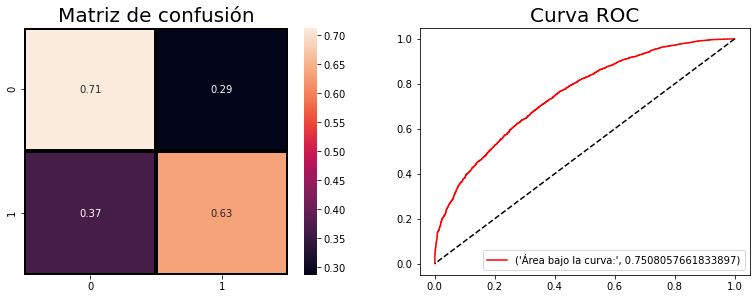

In [17]:
#Matriz de confusión
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test, predict),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
matriss = confusion_matrix(Y_test,predict,normalize='true')
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(matriss,annot=True,linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
# Curva ROC
predicting_probabilites = RNA.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test, predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Área bajo la curva:",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("Curva ROC",fontsize=20)

In [18]:
dc = QuadraticDiscriminantAnalysis()
parameters = {}
discriminante,X_test,Y_test = modeloAEntrenar(dc,parameters,X,Y)

C:\Users\Daniel Arango Obando\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[0 1 1 ... 0 0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Mejores Parametros: {}


In [19]:
#Guardar el modelo
joblib.dump(discriminante,'Modelos/AnalisisDiscriminanteCuadratico.pkl')
#Cargar Modelo
#nombre_modelo = 'Modelos/AnalisisDiscriminanteCuadratico.pkl'
#discriminante = joblib.load(nombre_modelo)

['Modelos/AnalisisDiscriminanteCuadratico.pkl']

In [20]:
predict = discriminante.predict(X_test)
acc_Disc = accuracy_score(predict, Y_test)
pre_Disc = precision_score(predict, Y_test)
rec_Disc = recall_score(predict, Y_test)
f1_Disc = f1_score(predict, Y_test)

In [21]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Modelo Discriminante Cuadratico': [acc_Disc, pre_Disc, rec_Disc, f1_Disc]
    })
table

,Metric,Modelo Discriminante Cuadratico
0,Accuracy,0.672968
1,Precision,0.823024
2,Recall,0.650189
3,F1 Score,0.726468


Text(0.5, 1.0, 'Curva ROC')

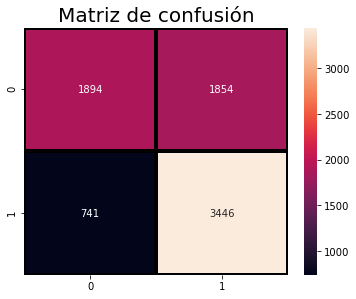

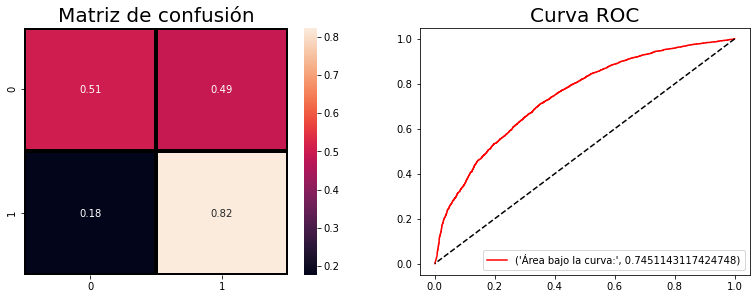

In [22]:
#Matriz de confusión
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test, predict),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
matriss = confusion_matrix(Y_test,predict,normalize='true')
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(matriss,annot=True,linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
# Curva ROC
predicting_probabilites = discriminante.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test, predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Área bajo la curva:",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("Curva ROC",fontsize=20)

In [ ]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors':[5,10,20,40,80,120]
    }
KNN,X_test,Y_test = modeloAEntrenar(knn,params,X,Y)


C:\Users\Daniel Arango Obando\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
#Guardar el modelo
joblib.dump(KNN,'Modelos/KNN.pkl')
#Cargar Modelo
#nombre_modelo = 'Modelos/KNN.pkl'
#KNN = joblib.load(nombre_modelo)

In [ ]:
predict = KNN.predict(X_test)
acc_KNN = accuracy_score(predict, Y_test)
pre_KNN = precision_score(predict, Y_test)
rec_KNN = recall_score(predict, Y_test)
f1_KNN = f1_score(predict, Y_test)

In [ ]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Modelo Naive Bayes': [acc_KNN, pre_KNN, rec_KNN, f1_KNN]
    })
table

In [ ]:
#Matriz de confusión
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test, predict),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
matriss = confusion_matrix(Y_test,predict,normalize='true')
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(matriss,annot=True,linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
# Curva ROC
predicting_probabilites = KNN.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test, predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Área bajo la curva:",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("Curva ROC",fontsize=20)